In [9]:
import numpy as np
import re, copy, sys

import matplotlib.pyplot as plt
%matplotlib inline

# lib/chromatogram.py is the library file
sys.path.append("..")
import chromatics

%config InlineBackend.figure_format='retina'

most abundant m/z values:
[371.2 371.4 372.2 391.2 339.2 372.4 340.2 349.2 392.2 284.2]


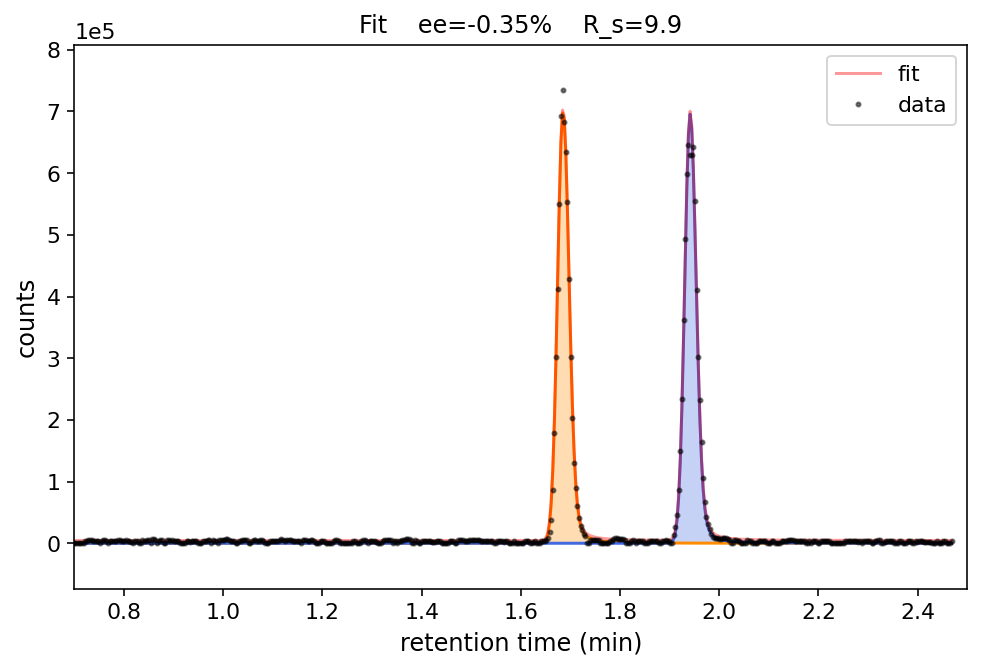

In [11]:
mass = 291.2

c = chromatics.Chromatogram.new_from_csv(
    "test.csv", # path to csv file
    x_start=(1,1), # where the x data start (matrix indexing of csv)
    y_start=(2,1), # where the y data start
    label_start=(2,0), # where the y labels start
    peaks=2, # how many peaks to fit
    baseline_corrections=True, # apply constant baseline
    max_len=750, # how many X/Y values to expect (to trim off trailing characters).
)

# Fit baseline to a defined region of graph with no peaks. (This can be omitted, and baseline will be fit normally.)
c.fit_baseline(
    label=mass,
    X_min=0.8,
    X_max=1.2,
)

# print Y_labels ordered by most Y signal
print("most abundant m/z values:")
print(c.top_labels()[:10])

# Fitting peaks
c.fit_peaks(
    label=mass, # which trace we're going to model
    times=None, # `times` can be a list of retention times for peak centers, 
    # or "keep" to keep current times fixed, or None to detect peaks automatically
)   

# Plotting the fit chromatogram is easy with matplotlib
fig = plt.figure(figsize=(8,5))
ax = fig.gca()

c.plot(
    ax, 
    label=mass, 
    legend=True, # show legend
)

ax.set_title(f"Fit    ee={c.ee():.2f}%    R_s={c.R():.1f}")
ax.set_xlim(left=0.7,right=2.5)
plt.show()     

In [22]:
# This is just some example code demonstrating how to access the internal state of the objects.

print("ee:")
print(c.ee())
print("")

print("R_s:")
print(c.R())
print("")

print("FIT METRICS:")
print(c.fit_metrics(label=mass))
print("")

print("PEAK AREAS:")
print(c.areas())
print("")

print("PEAK OBJECT ATTRIBUTES:")
for i, p in enumerate(c.peaks):
    print(f"\tpeak {i}:")
    print(f"\tmodel:\t{p.model}")
    print(f"\tparams:")
    for k, v in p.params.items():
        print(f"\t\t{k}:\t{v:.5f}")
    
print("\n")
print("BASELINE OBJECT ATTRIBUTES:")
for p in c.baseline_corrections:
    print(f"\tmodel:\t{p.model}")
    print(f"\tparams:")
    for k, v in p.params.items():
        print(f"\t\t{k}:\t{v:.5f}")

ee:
-0.354605403409769

R_s:
9.854166249790937

FIT METRICS:
{'R2': 0.9951639580593871, 'MSE': 4.2606951391037375e-05}

PEAK AREAS:
[0.50177303 0.49822697]

PEAK OBJECT ATTRIBUTES:
	peak 0:
	model:	<lmfit.Model: Model(frankenstein, prefix='p0_')>
	params:
		amplitude:	0.01097
		center:	1.68520
		sigma:	0.01094
		gamma:	0.00279
	peak 1:
	model:	<lmfit.Model: Model(frankenstein, prefix='p1_')>
	params:
		amplitude:	0.01090
		center:	1.94144
		sigma:	0.01094
		gamma:	0.00279


BASELINE OBJECT ATTRIBUTES:
	model:	<lmfit.Model: Model(constant, prefix='b0_')>
	params:
		c:	0.00256


In [29]:
# Chromatogram objects can be saved to files (conventionally named `.chrom`) and loaded.
# This can be used in order to save the fits, etc.

c.save("test_save.chrom")
c2 = chromatics.Chromatogram.load("test_save.chrom")

print(c2.ee())
print(c2.R())

-0.354605403409769
9.854166249790937


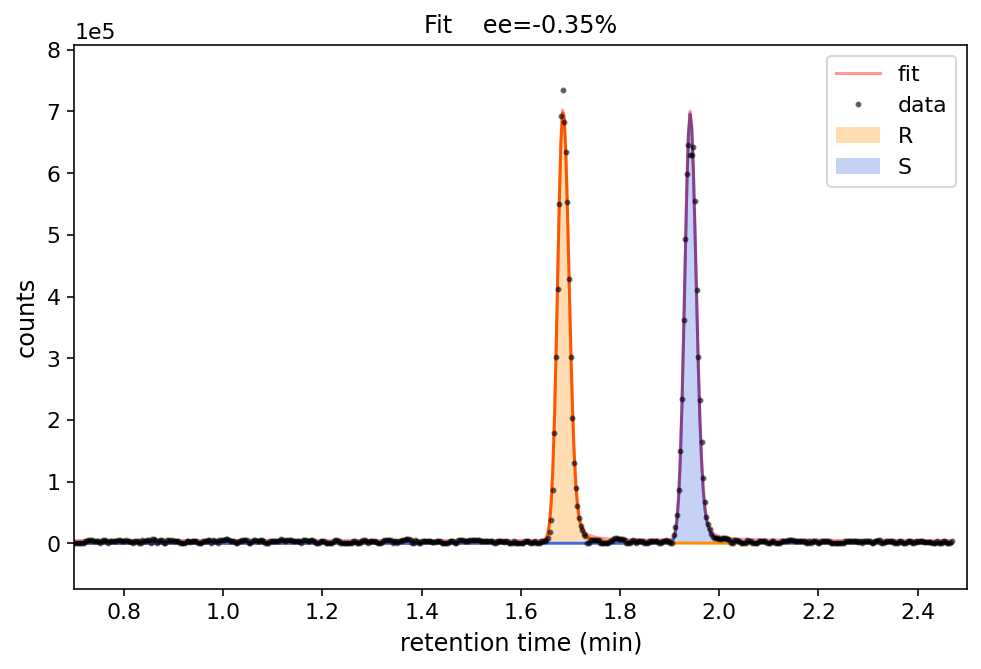

In [24]:
# if we label the peaks, the labels show up visually
c2.peaks[0].label = "R"
c2.peaks[1].label = "S"

fig = plt.figure(figsize=(8,5))
ax = fig.gca()
c2.plot(ax, label=mass, legend=True)
ax.set_title(f"Fit    ee={c.ee():.2f}%")
ax.set_xlim(left=0.7,right=2.5)
plt.show() 

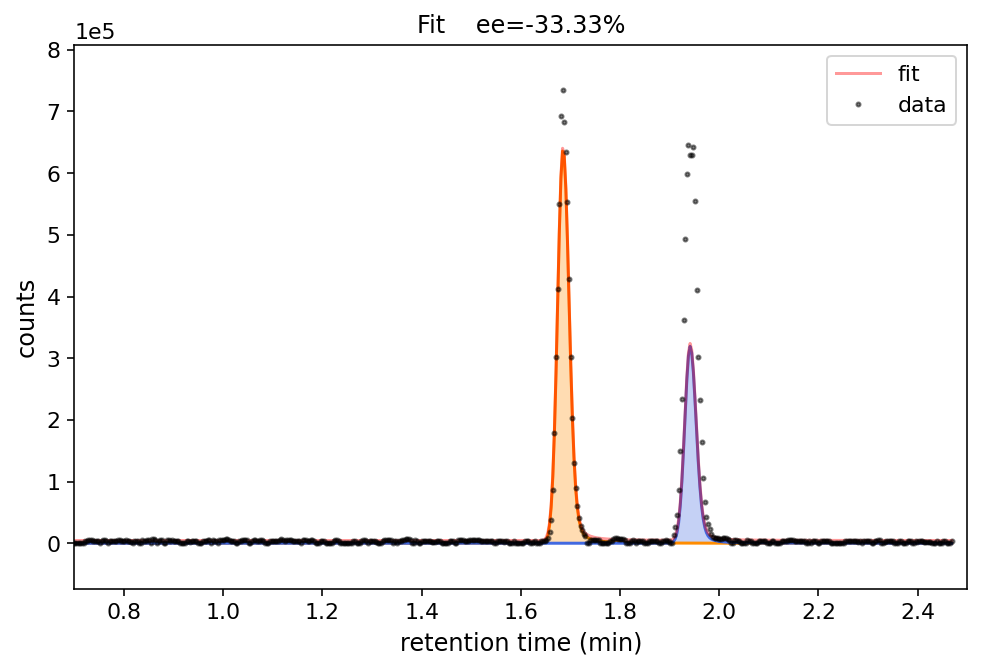

Fixed that for you


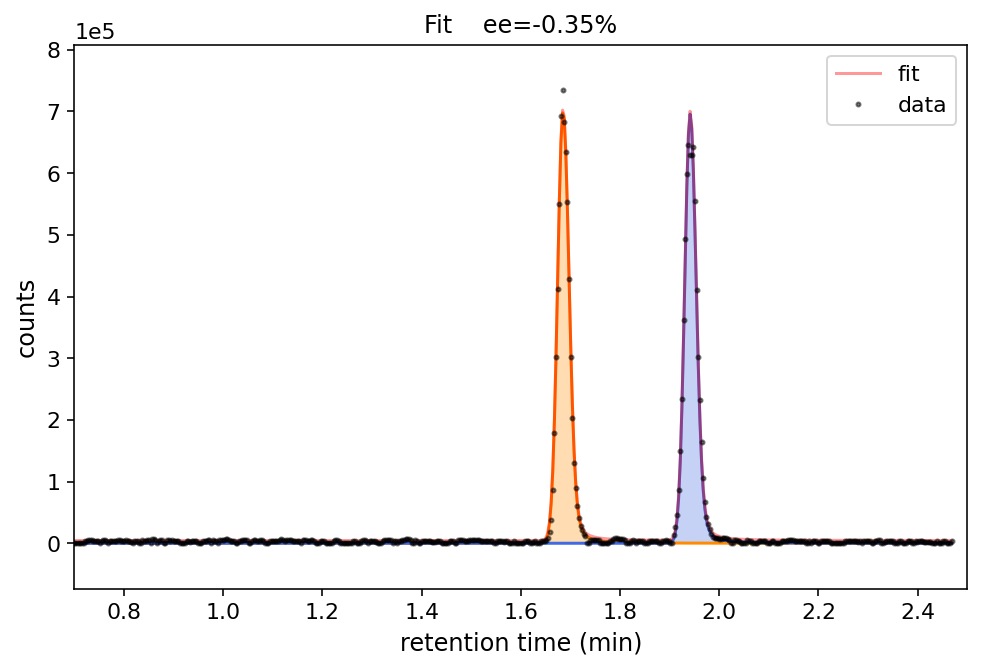

In [28]:
# If you change the peak parameters, the graph, ee, etc update automatically. 

c.peaks[0].params["amplitude"] = 0.010
c.peaks[1].params["amplitude"] = 0.005

fig = plt.figure(figsize=(8,5))
ax = fig.gca()
c.plot(ax, label=mass, legend=True)
ax.set_title(f"Fit    ee={c.ee():.2f}%")
ax.set_xlim(left=0.7,right=2.5)
plt.show() 

# We can reoptimize and fix the parameters
c.fit_peaks(label=mass)
print("Fixed that for you")

fig = plt.figure(figsize=(8,5))
ax = fig.gca()
c.plot(ax, label=mass, legend=True)
ax.set_title(f"Fit    ee={c.ee():.2f}%")
ax.set_xlim(left=0.7,right=2.5)
plt.show()